<a href="https://colab.research.google.com/github/2303A51739/AIML-1739-/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [6]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [8]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


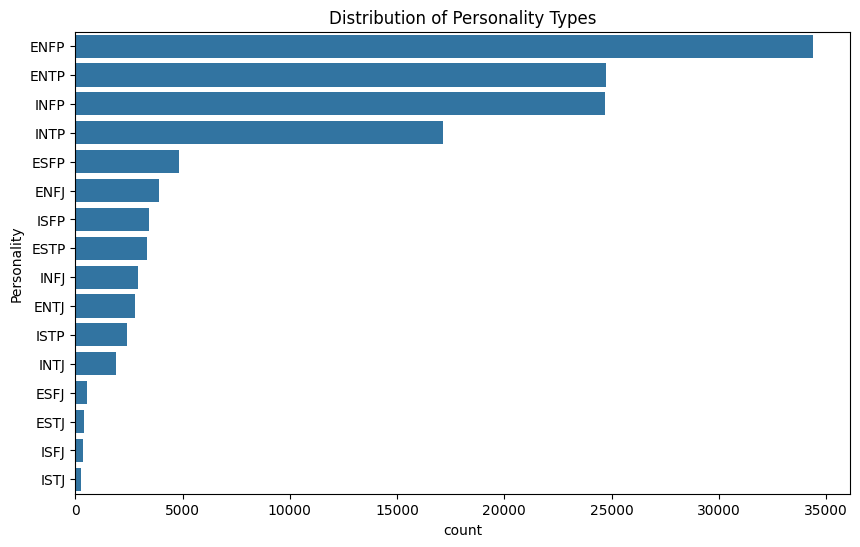

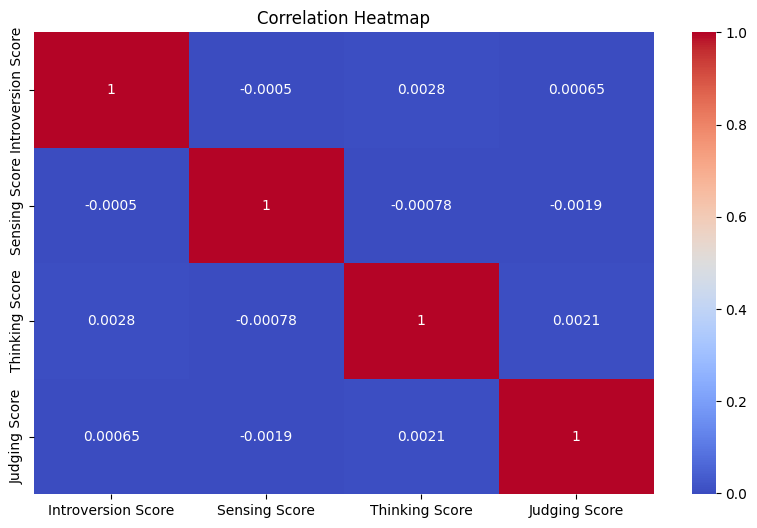

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Personality'], order=df['Personality'].value_counts().index)
plt.title('Distribution of Personality Types')
plt.show()

# Plot correlation heatmap of numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
numerical_features = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

<ipython-input-11-d17bae655eed>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
<ipython-input-11-d17bae655eed>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
<ipython-input-11-d17bae655eed>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
<ipython-input-11-d17bae655eed>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


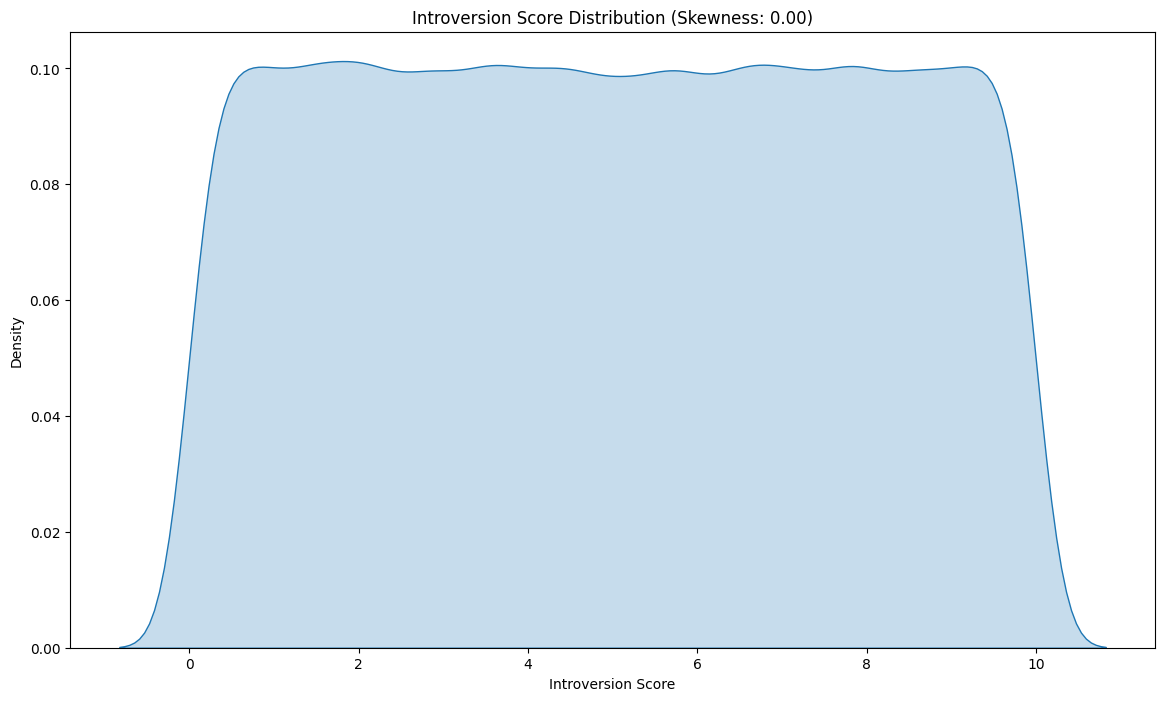

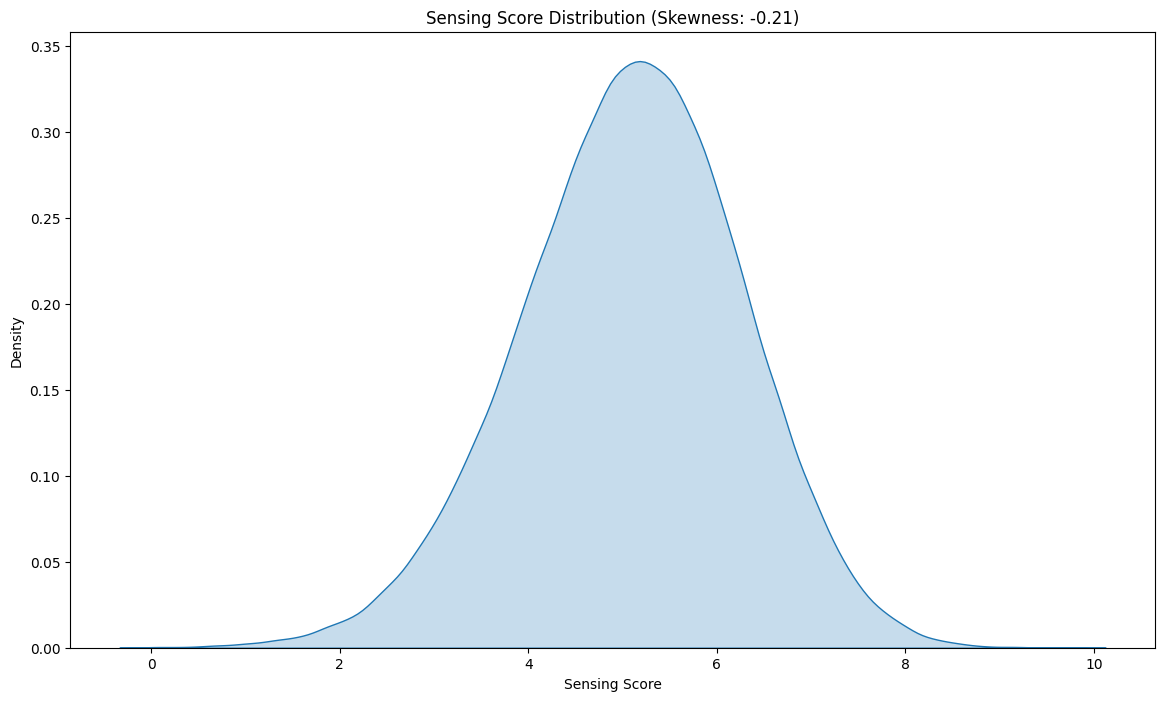

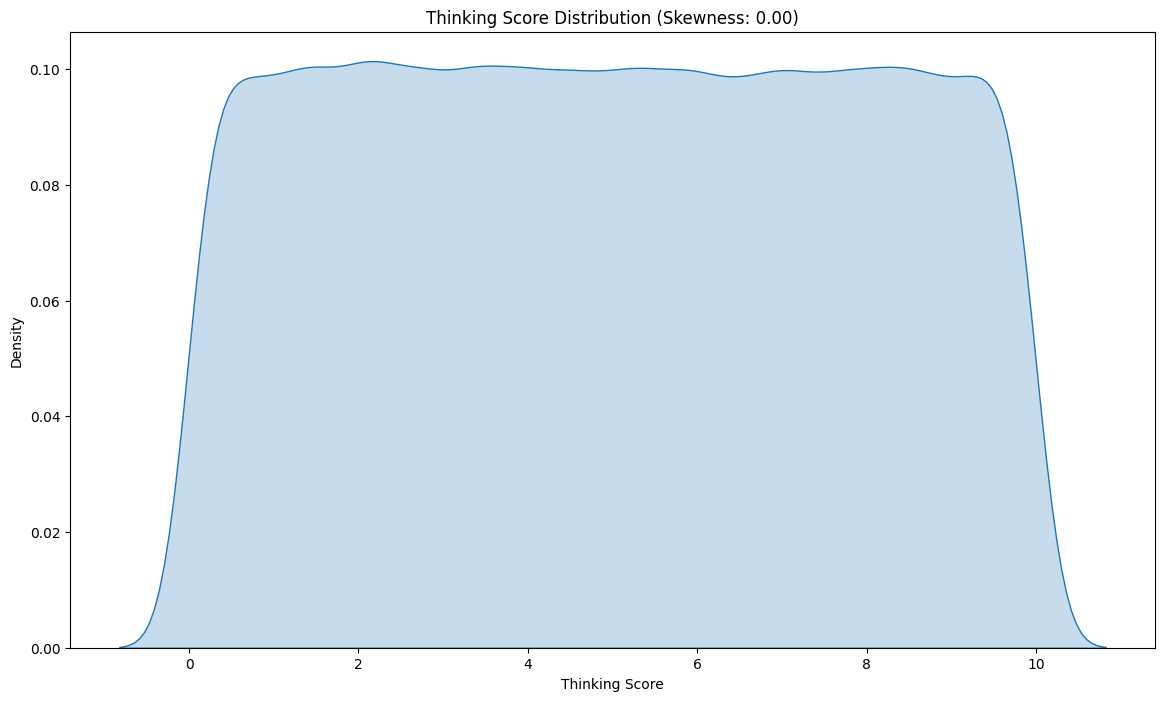

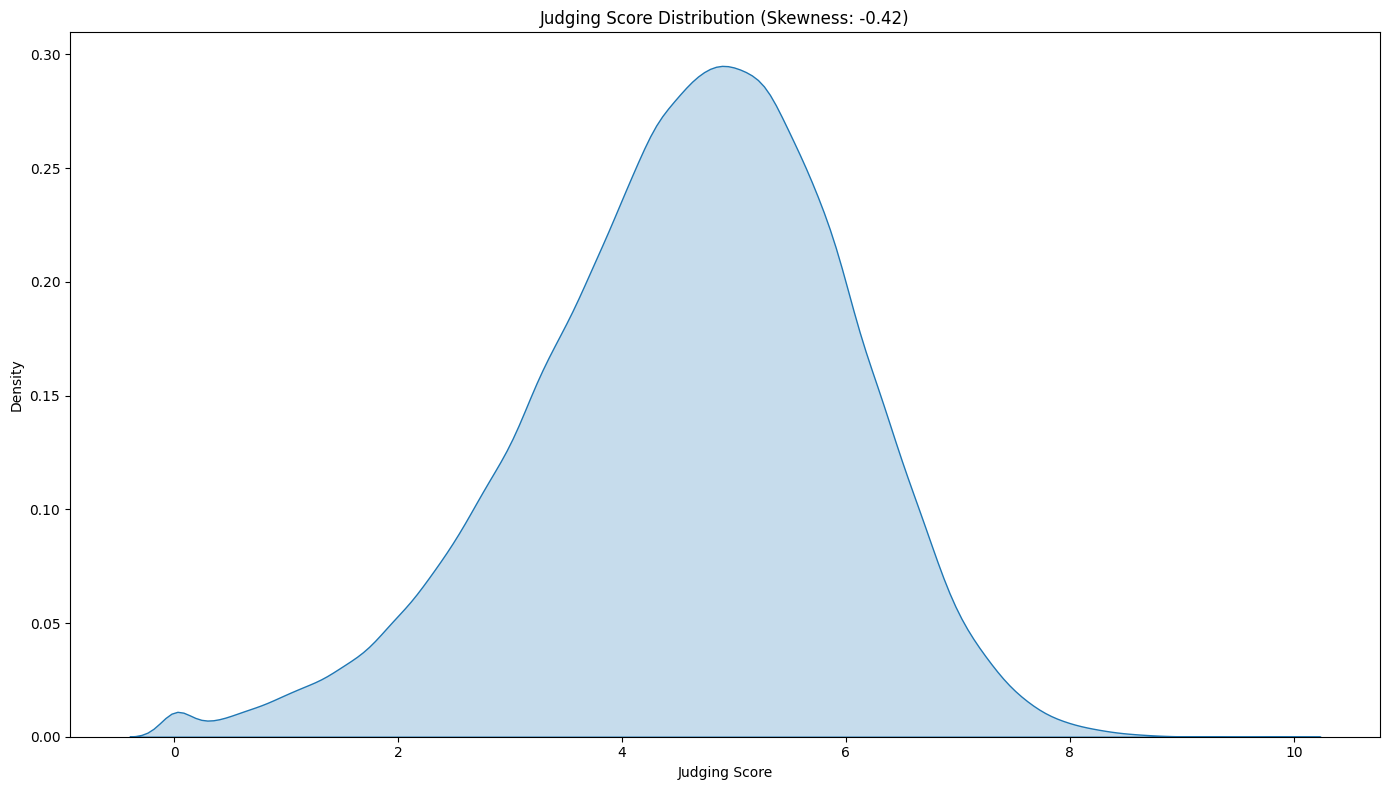

In [11]:
from scipy.stats import skew

for i, feature in enumerate(numerical_features, 1):
    plt.figure(figsize=(14,8))
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'{feature} Distribution (Skewness: {skew(df[feature]):.2f})')
plt.tight_layout()
plt.show()

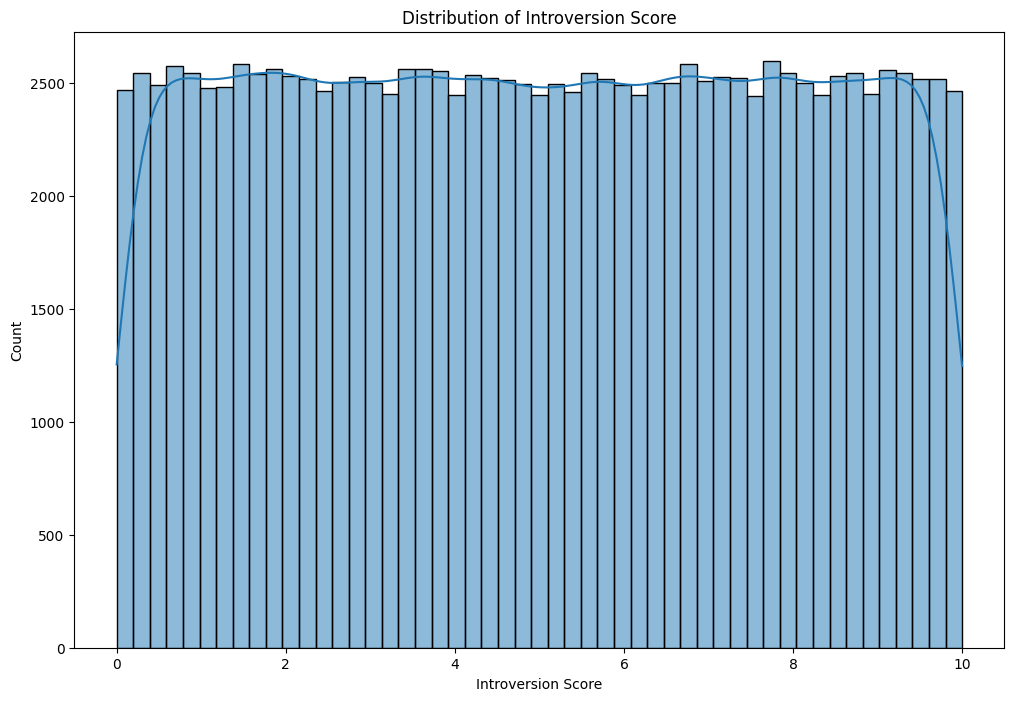

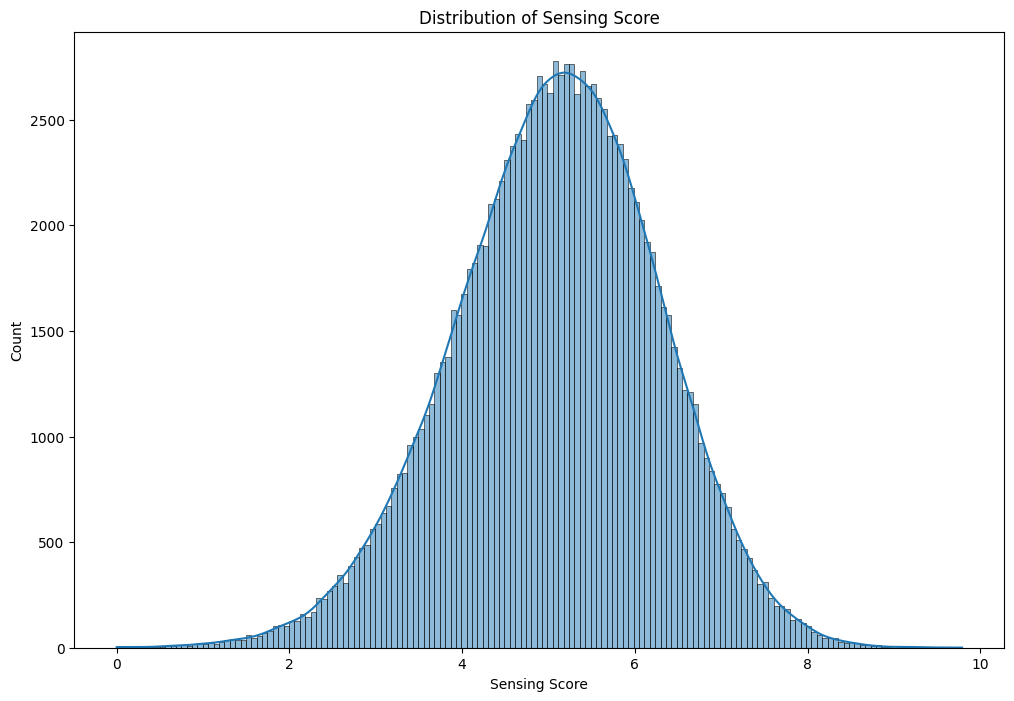

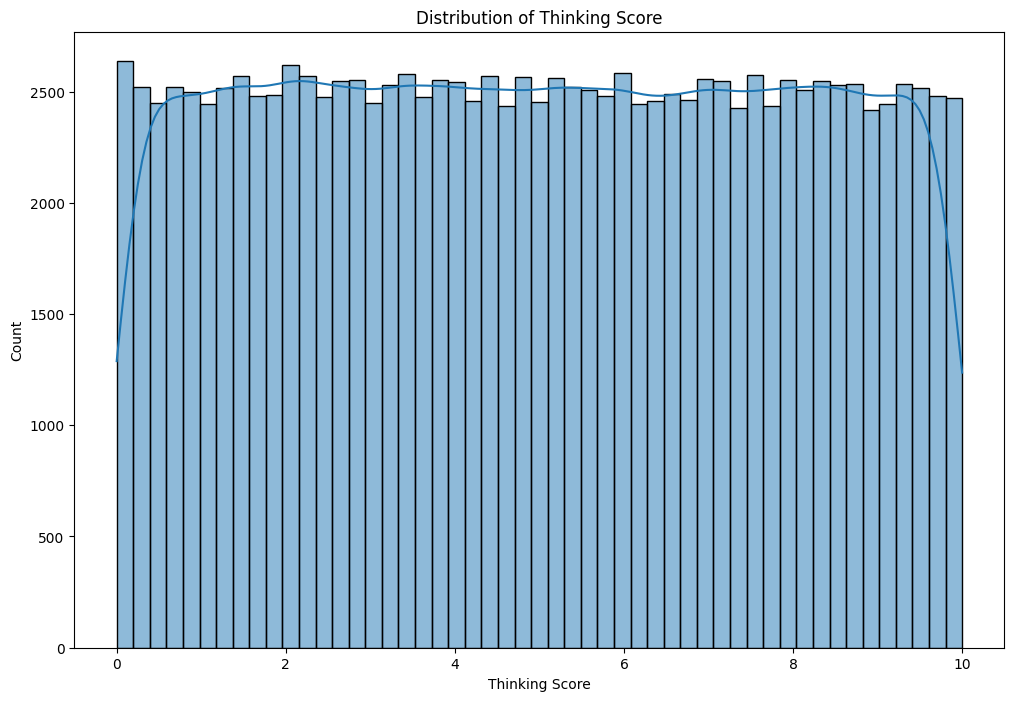

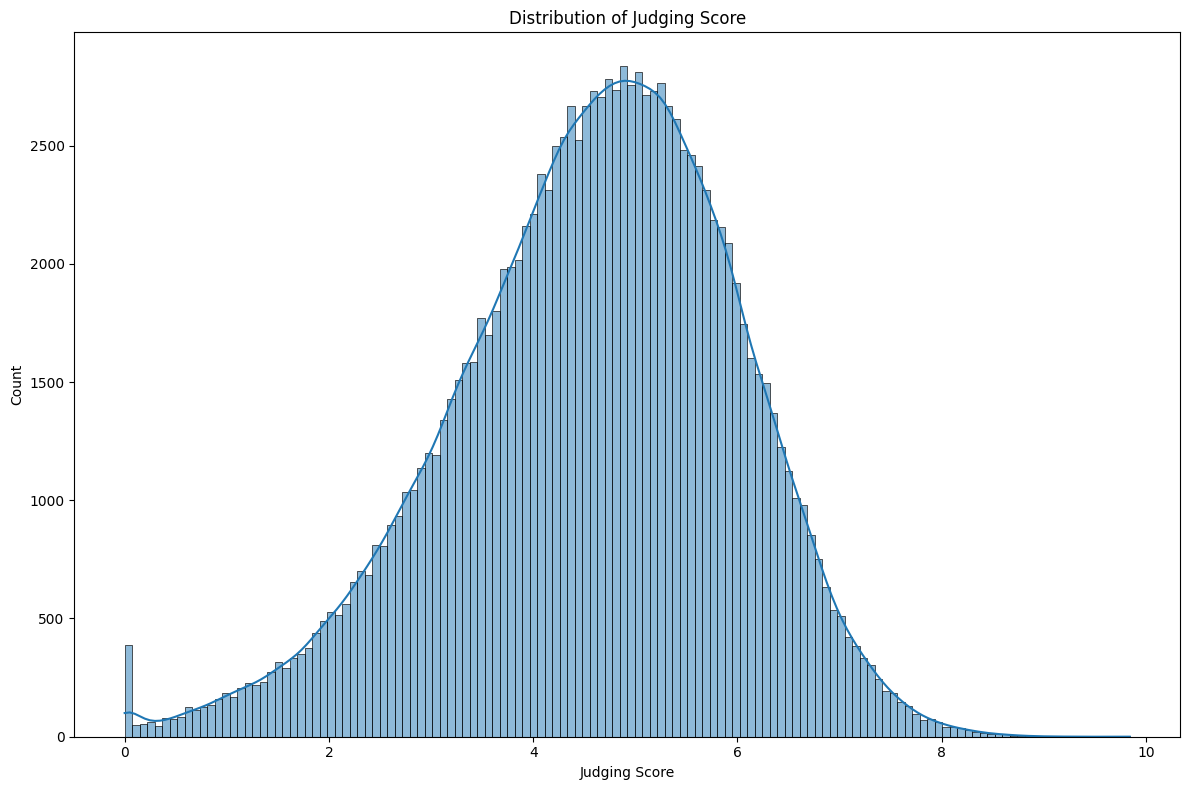

In [12]:
for i, col in enumerate(numerical_features, 1):
    plt.figure(figsize=(12,8))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

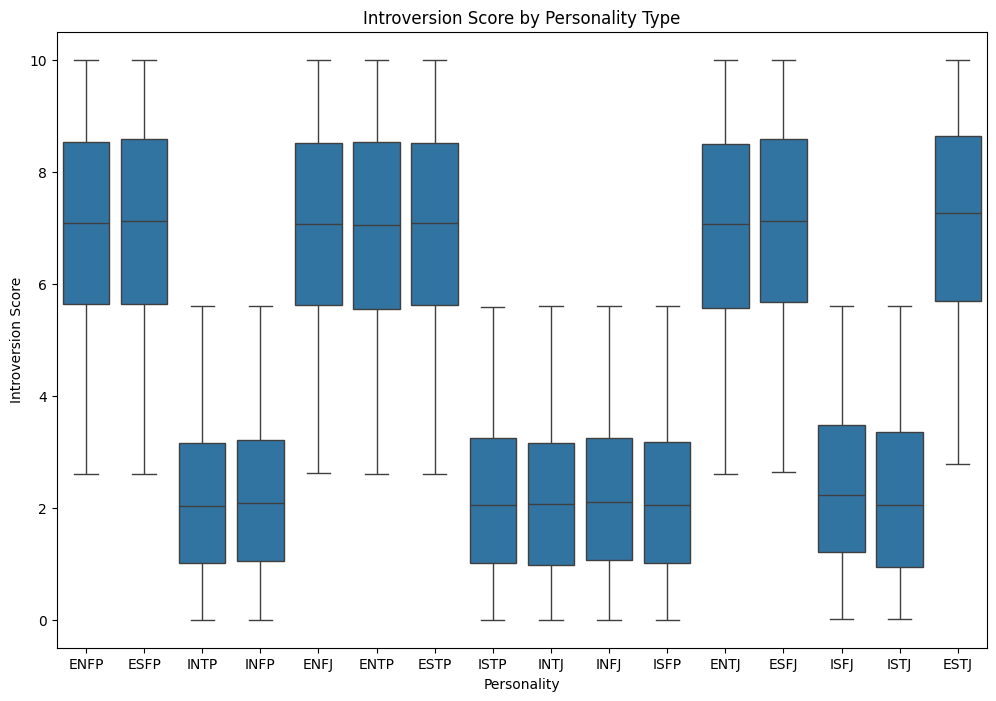

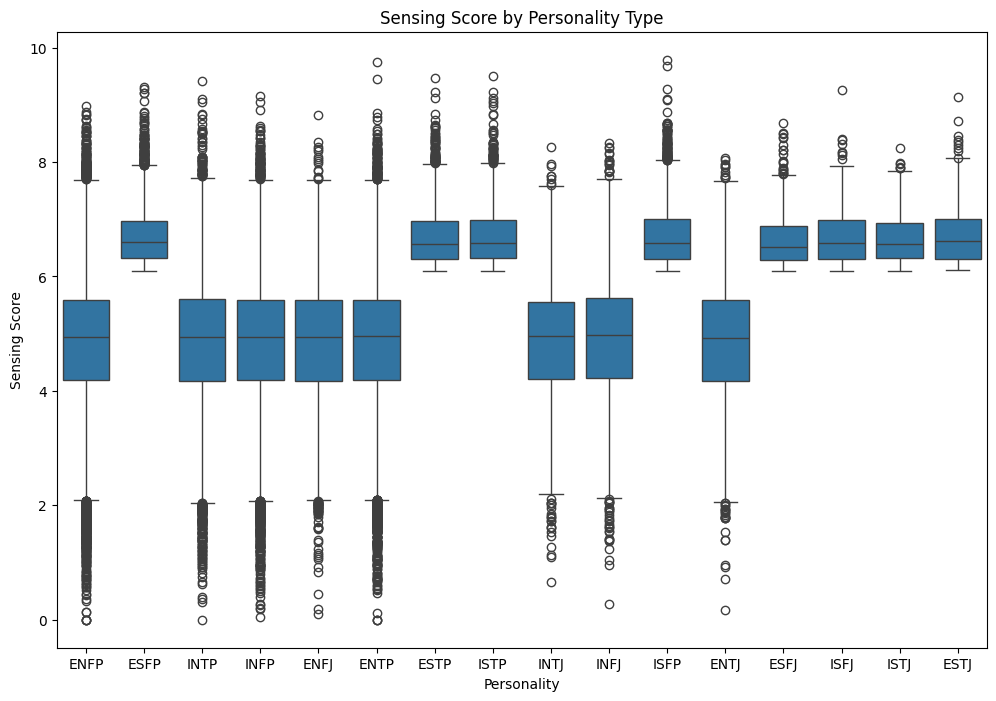

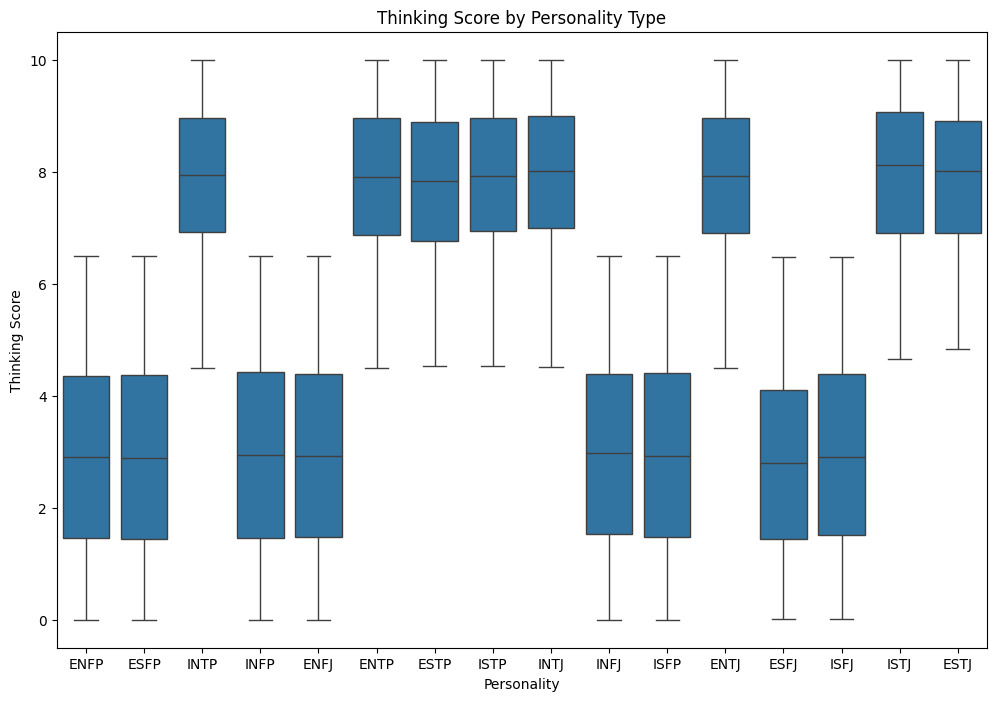

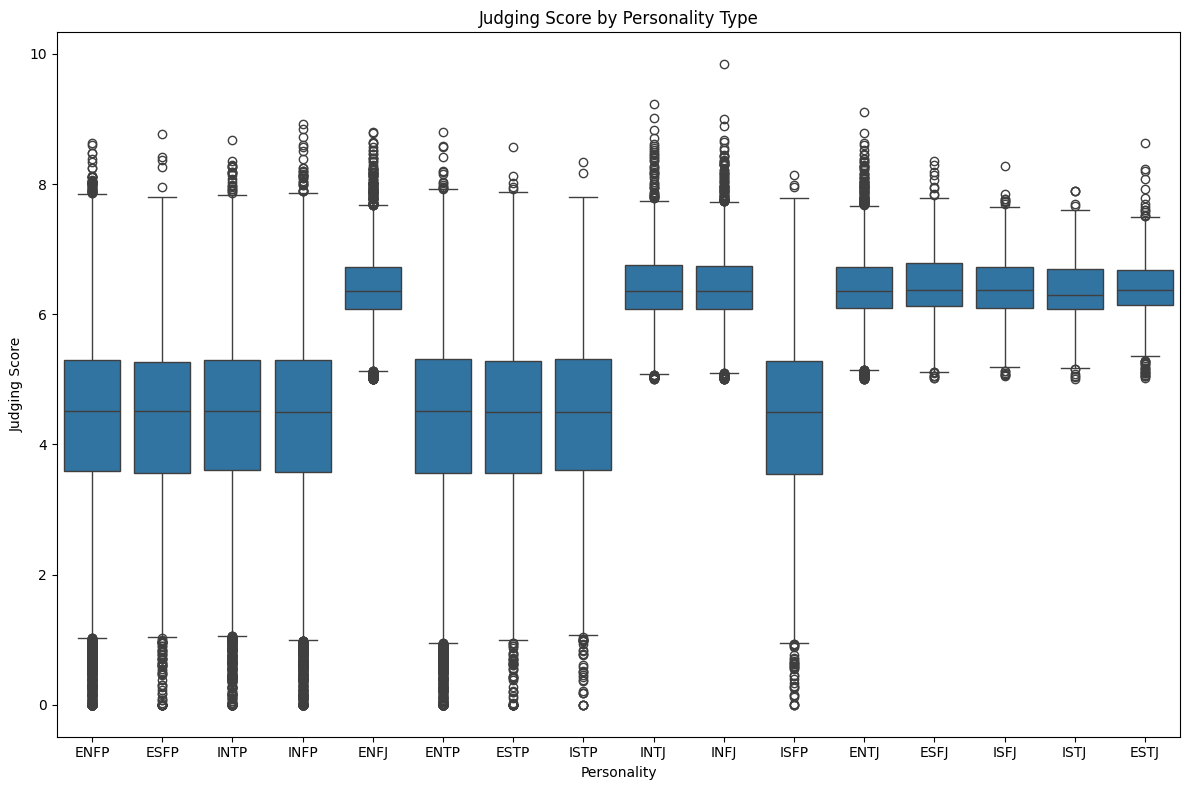

In [13]:
for i, col in enumerate(['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score'], 1):
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} by Personality Type')
plt.tight_layout()
plt.show()

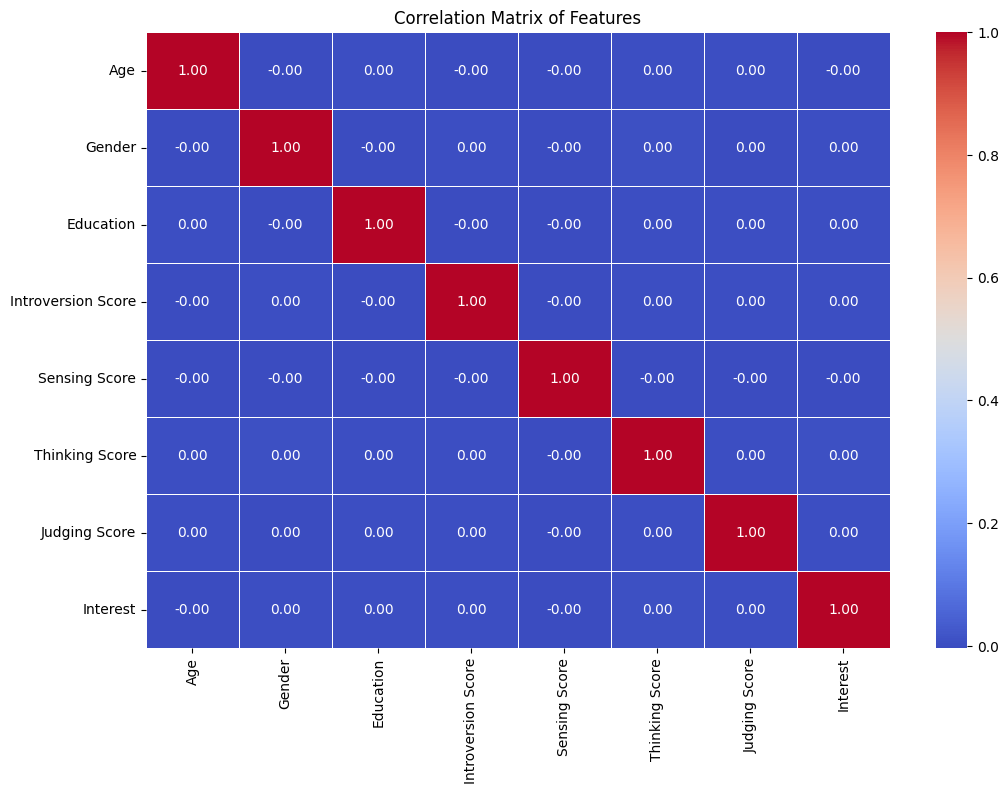

In [14]:
label_encoders = {}
for column in ['Gender', 'Interest', 'Education', 'Personality']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Personality']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
# # Parallel Coordinates plot for features by Personality
# from pandas.plotting import parallel_coordinates

# # Select relevant features and personality column
# parallel_df = df[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score', 'Personality']]

# plt.figure(figsize=(10,6))
# parallel_coordinates(parallel_df, 'Personality', color=plt.cm.Set1.colors)
# plt.title('Parallel Coordinates Plot')
# plt.xticks(rotation=45)
# plt.show()

In [16]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:

!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']] = scaler.fit_transform(round(X_train[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']],5))
X_test[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']] = scaler.transform(round(X_test[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']], 5))

In [23]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9052348825587206

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       991
           1       0.93      0.93      0.93      8641
           2       0.94      0.91      0.92       693
           3       0.92      0.93      0.93      6289
           4       0.84      0.77      0.80       132
           5       0.84      0.85      0.85      1207
           6       0.87      0.74      0.80       100
           7       0.85      0.82      0.83       805
           8       0.92      0.90      0.91       762
           9       0.90      0.91      0.90      6109
          10       0.92      0.88      0.90       464
          11       0.89      0.90      0.90      4268
          12       0.91      0.62      0.74        95
          13       0.81      0.78      0.80       831
          14       0.77      0.74      0.75        62
          15       0.83      0.80      0.81       567

    accuracy              

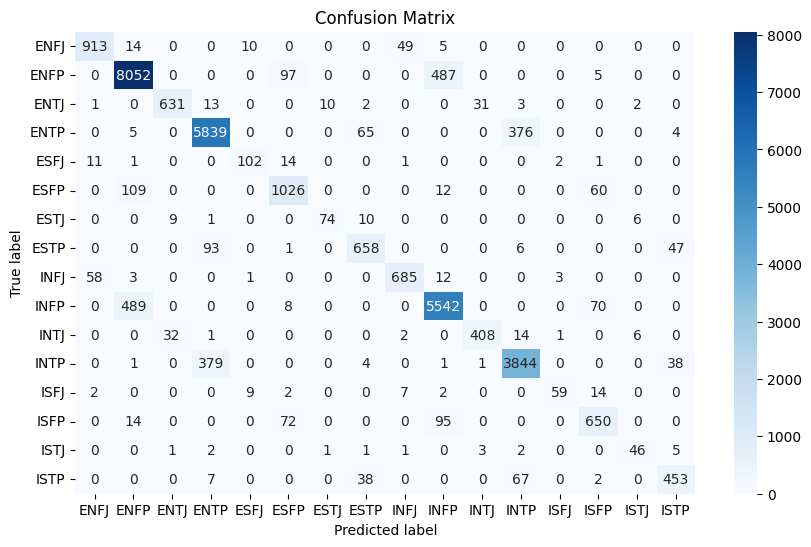

In [25]:

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Personality'].classes_, yticklabels=label_encoders['Personality'].classes_)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

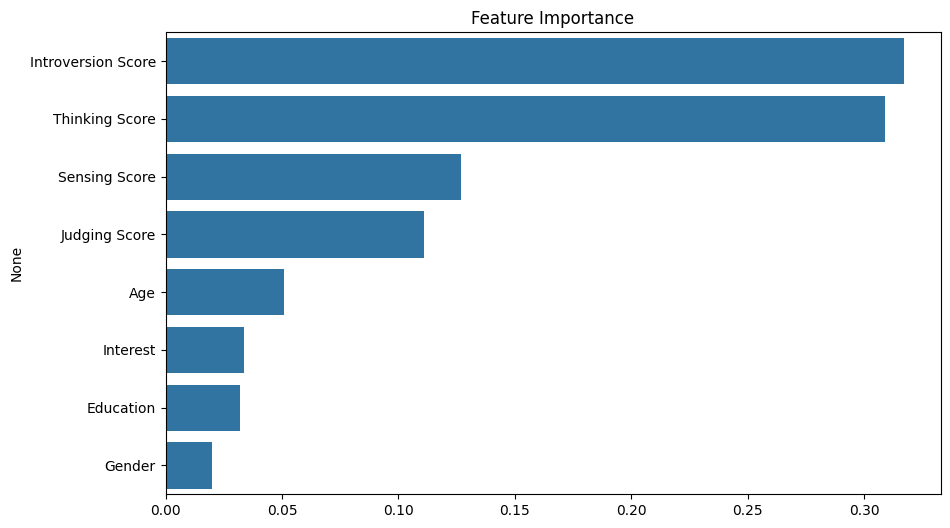

In [26]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Now precision_score is defined
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [28]:

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       991
           1       0.93      0.93      0.93      8641
           2       0.94      0.91      0.92       693
           3       0.92      0.93      0.93      6289
           4       0.84      0.77      0.80       132
           5       0.84      0.85      0.85      1207
           6       0.87      0.74      0.80       100
           7       0.85      0.82      0.83       805
           8       0.92      0.90      0.91       762
           9       0.90      0.91      0.90      6109
          10       0.92      0.88      0.90       464
          11       0.89      0.90      0.90      4268
          12       0.91      0.62      0.74        95
          13       0.81      0.78      0.80       831
          14       0.77      0.74      0.75        62
          15       0.83      0.80      0.81       56